# Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the Dataset
dataset = pd.read_csv('Update-Detaset with hacking1.csv')
dataset.head()

,Date,Time,Period Time,Previous captured frame,Previous displayed frame,Time Since Reference,Payload length,Total Length,Output
0,27-Oct-18,19:05.1,1540631945,0.186248,0.000000,17.332187,183,203,0
1,27-Oct-18,19:08.1,1540631948,0.064265,2.965492,20.297679,183,203,0
2,27-Oct-18,19:08.1,1540742048,0.065365,2.965492,20.297679,183,203,1
3,27-Oct-18,19:11.1,1540631951,3.070094,3.070094,23.367773,183,203,0
4,27-Oct-18,19:14.1,1540631954,0.111239,2.967332,26.335105,183,203,0


In [3]:
dataset['Output'].value_counts()

0    269
1    136
Name: Output, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
Date                        405 non-null object
Time                        405 non-null object
Period Time                 405 non-null int64
Previous captured frame     405 non-null float64
Previous displayed frame    405 non-null float64
Time Since Reference        405 non-null float64
Payload length              405 non-null int64
Total Length                405 non-null int64
Output                      405 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.6+ KB


In [5]:
y=[]
X = dataset.iloc[:,2:7]
y = dataset.iloc[:,8].values


In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
Y = np.reshape(y,(-1,1))
imputer = imputer.fit(Y)
Y= imputer.transform(Y)

C:\Users\mirza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


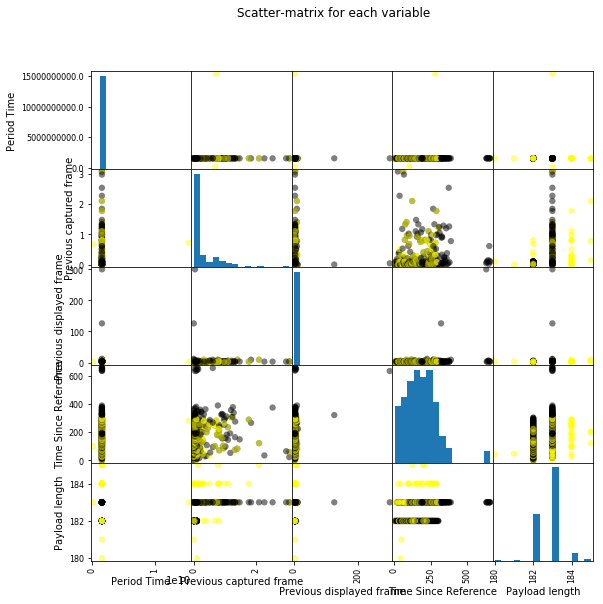

In [7]:
#from pandas.plotting import scatter_matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix
#feature_names = ['x', 'xa', 'xs', 'xd']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each variable')
#plt.figure(figsize=(16, 16), dpi=80)
plt.savefig('pic.png')
plt.show()

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\mirza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mirza\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mirza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Artficial Neural Network

In [23]:
import keras

In [24]:
from keras.models import Sequential 

In [25]:
# Importing the Keras libraries and packages
from keras.layers import Dense

In [26]:
# Initialising the ANN
classifier = Sequential() 

In [27]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=5, units=8, kernel_initializer="uniform"))

In [28]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))


In [29]:
# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=2, kernel_initializer="uniform"))


In [30]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [31]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, nb_epoch=1500, batch_size=10) 

C:\Users\mirza\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
324/324 [==============================] - 3s 10ms/step - loss: 0.6914 - acc: 0.6420
Epoch 2/1500
324/324 [==============================] - 0s 336us/step - loss: 0.6876 - acc: 0.6605
Epoch 3/1500
324/324 [==============================] - 0s 330us/step - loss: 0.6835 - acc: 0.6605
Epoch 4/1500
324/324 [==============================] - 0s 278us/step - loss: 0.6788 - acc: 0.6605
Epoch 5/1500
324/324 [==============================] - 0s 296us/step - loss: 0.6739 - acc: 0.6605
Epoch 6/1500
324/324 [==============================] - 0s 259us/step - loss: 0.6682 - acc: 0.6605
Epoch 7/1500
324/324 [==============================] - 0s 318us/step - loss: 0.6612 - acc: 0.6605
Epoch 8/1500
324/324 [==============================] - 0s 342us/step - loss: 0.6522 - acc: 0.6605
Epoch 9/1500
324/324 [==============================] - 0s 219us/step - loss: 0.6411 - acc: 0.6605
Epoch 10/1500
324/324 [==============================] - 0s 26

324/324 [==============================] - 0s 279us/step - loss: 0.5546 - acc: 0.7130
Epoch 81/1500
324/324 [==============================] - 0s 284us/step - loss: 0.5542 - acc: 0.7006
Epoch 82/1500
324/324 [==============================] - 0s 226us/step - loss: 0.5546 - acc: 0.7099
Epoch 83/1500
324/324 [==============================] - 0s 216us/step - loss: 0.5535 - acc: 0.7130
Epoch 84/1500
324/324 [==============================] - 0s 299us/step - loss: 0.5534 - acc: 0.7253
Epoch 85/1500
324/324 [==============================] - 0s 259us/step - loss: 0.5534 - acc: 0.7099
Epoch 86/1500
324/324 [==============================] - 0s 275us/step - loss: 0.5532 - acc: 0.7099
Epoch 87/1500
324/324 [==============================] - ETA: 0s - loss: 0.5412 - acc: 0.715 - 0s 290us/step - loss: 0.5524 - acc: 0.7160
Epoch 88/1500
324/324 [==============================] - 0s 250us/step - loss: 0.5538 - acc: 0.7099
Epoch 89/1500
324/324 [==============================] - 0s 265us/step - los

324/324 [==============================] - 0s 260us/step - loss: 0.5364 - acc: 0.7006
Epoch 161/1500
324/324 [==============================] - 0s 231us/step - loss: 0.5359 - acc: 0.6944
Epoch 162/1500
324/324 [==============================] - 0s 278us/step - loss: 0.5359 - acc: 0.6944
Epoch 163/1500
324/324 [==============================] - 0s 376us/step - loss: 0.5355 - acc: 0.6944
Epoch 164/1500
324/324 [==============================] - 0s 250us/step - loss: 0.5354 - acc: 0.6944
Epoch 165/1500
324/324 [==============================] - 0s 321us/step - loss: 0.5358 - acc: 0.6975
Epoch 166/1500
324/324 [==============================] - 0s 241us/step - loss: 0.5346 - acc: 0.6975
Epoch 167/1500
324/324 [==============================] - 0s 330us/step - loss: 0.5343 - acc: 0.6944
Epoch 168/1500
324/324 [==============================] - 0s 271us/step - loss: 0.5344 - acc: 0.6944
Epoch 169/1500
324/324 [==============================] - 0s 253us/step - loss: 0.5337 - acc: 0.6975
Epoch

324/324 [==============================] - 0s 250us/step - loss: 0.5206 - acc: 0.6914
Epoch 242/1500
324/324 [==============================] - 0s 250us/step - loss: 0.5206 - acc: 0.6944
Epoch 243/1500
324/324 [==============================] - 0s 222us/step - loss: 0.5196 - acc: 0.6944
Epoch 244/1500
324/324 [==============================] - 0s 225us/step - loss: 0.5193 - acc: 0.6944
Epoch 245/1500
324/324 [==============================] - 0s 219us/step - loss: 0.5205 - acc: 0.6914
Epoch 246/1500
324/324 [==============================] - 0s 219us/step - loss: 0.5198 - acc: 0.6883
Epoch 247/1500
324/324 [==============================] - 0s 275us/step - loss: 0.5187 - acc: 0.6914
Epoch 248/1500
324/324 [==============================] - 0s 287us/step - loss: 0.5194 - acc: 0.6914
Epoch 249/1500
324/324 [==============================] - 0s 253us/step - loss: 0.5190 - acc: 0.6944
Epoch 250/1500
324/324 [==============================] - 0s 299us/step - loss: 0.5196 - acc: 0.6944
Epoch

324/324 [==============================] - 0s 327us/step - loss: 0.5125 - acc: 0.6975
Epoch 322/1500
324/324 [==============================] - 0s 312us/step - loss: 0.5122 - acc: 0.6914
Epoch 323/1500
324/324 [==============================] - 0s 219us/step - loss: 0.5125 - acc: 0.6944
Epoch 324/1500
324/324 [==============================] - 0s 262us/step - loss: 0.5116 - acc: 0.6914
Epoch 325/1500
324/324 [==============================] - 0s 228us/step - loss: 0.5115 - acc: 0.6944
Epoch 326/1500
324/324 [==============================] - 0s 271us/step - loss: 0.5124 - acc: 0.6975
Epoch 327/1500
324/324 [==============================] - 0s 330us/step - loss: 0.5117 - acc: 0.6914
Epoch 328/1500
324/324 [==============================] - 0s 259us/step - loss: 0.5108 - acc: 0.6975
Epoch 329/1500
324/324 [==============================] - 0s 432us/step - loss: 0.5108 - acc: 0.6944
Epoch 330/1500
324/324 [==============================] - 0s 390us/step - loss: 0.5097 - acc: 0.6975
Epoch

324/324 [==============================] - 0s 278us/step - loss: 0.5054 - acc: 0.6975
Epoch 402/1500
324/324 [==============================] - 0s 303us/step - loss: 0.5045 - acc: 0.6944
Epoch 403/1500
324/324 [==============================] - 0s 287us/step - loss: 0.5057 - acc: 0.6883
Epoch 404/1500
324/324 [==============================] - 0s 256us/step - loss: 0.5048 - acc: 0.6975
Epoch 405/1500
324/324 [==============================] - 0s 241us/step - loss: 0.5069 - acc: 0.6975
Epoch 406/1500
324/324 [==============================] - 0s 268us/step - loss: 0.5049 - acc: 0.7037
Epoch 407/1500
324/324 [==============================] - 0s 213us/step - loss: 0.5045 - acc: 0.6975
Epoch 408/1500
324/324 [==============================] - 0s 271us/step - loss: 0.5038 - acc: 0.6975
Epoch 409/1500
324/324 [==============================] - 0s 395us/step - loss: 0.5044 - acc: 0.6975
Epoch 410/1500
324/324 [==============================] - 0s 250us/step - loss: 0.5047 - acc: 0.6975
Epoch

324/324 [==============================] - 0s 373us/step - loss: 0.4994 - acc: 0.7006
Epoch 482/1500
324/324 [==============================] - 0s 318us/step - loss: 0.4995 - acc: 0.6975
Epoch 483/1500
324/324 [==============================] - 0s 410us/step - loss: 0.4992 - acc: 0.7006
Epoch 484/1500
324/324 [==============================] - 0s 450us/step - loss: 0.4999 - acc: 0.6975
Epoch 485/1500
324/324 [==============================] - 0s 275us/step - loss: 0.4987 - acc: 0.7006
Epoch 486/1500
324/324 [==============================] - 0s 282us/step - loss: 0.4999 - acc: 0.7006
Epoch 487/1500
324/324 [==============================] - 0s 308us/step - loss: 0.4984 - acc: 0.6975
Epoch 488/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4998 - acc: 0.6975
Epoch 489/1500
324/324 [==============================] - 0s 256us/step - loss: 0.5001 - acc: 0.7037
Epoch 490/1500
324/324 [==============================] - 0s 367us/step - loss: 0.4979 - acc: 0.7037
Epoch

324/324 [==============================] - 0s 299us/step - loss: 0.4949 - acc: 0.7006
Epoch 562/1500
324/324 [==============================] - 0s 238us/step - loss: 0.4941 - acc: 0.7006
Epoch 563/1500
324/324 [==============================] - 0s 271us/step - loss: 0.4948 - acc: 0.6975
Epoch 564/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4955 - acc: 0.6975
Epoch 565/1500
324/324 [==============================] - 0s 247us/step - loss: 0.4957 - acc: 0.7006
Epoch 566/1500
324/324 [==============================] - 0s 281us/step - loss: 0.4939 - acc: 0.7037
Epoch 567/1500
324/324 [==============================] - 0s 392us/step - loss: 0.4939 - acc: 0.6944
Epoch 568/1500
324/324 [==============================] - 0s 271us/step - loss: 0.4943 - acc: 0.6975
Epoch 569/1500
324/324 [==============================] - 0s 293us/step - loss: 0.4943 - acc: 0.6944
Epoch 570/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4938 - acc: 0.7006
Epoch

324/324 [==============================] - 0s 262us/step - loss: 0.4900 - acc: 0.7037
Epoch 643/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4908 - acc: 0.7006
Epoch 644/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4901 - acc: 0.7006
Epoch 645/1500
324/324 [==============================] - 0s 238us/step - loss: 0.4908 - acc: 0.7037
Epoch 646/1500
324/324 [==============================] - 0s 231us/step - loss: 0.4912 - acc: 0.7037
Epoch 647/1500
324/324 [==============================] - 0s 250us/step - loss: 0.4909 - acc: 0.7037
Epoch 648/1500
324/324 [==============================] - 0s 256us/step - loss: 0.4901 - acc: 0.7006
Epoch 649/1500
324/324 [==============================] - 0s 389us/step - loss: 0.4908 - acc: 0.6975
Epoch 650/1500
324/324 [==============================] - 0s 284us/step - loss: 0.4907 - acc: 0.7068
Epoch 651/1500
324/324 [==============================] - 0s 241us/step - loss: 0.4901 - acc: 0.7068
Epoch

Epoch 723/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4880 - acc: 0.7068
Epoch 724/1500
324/324 [==============================] - 0s 263us/step - loss: 0.4885 - acc: 0.7037
Epoch 725/1500
324/324 [==============================] - 0s 293us/step - loss: 0.4873 - acc: 0.6975
Epoch 726/1500
324/324 [==============================] - 0s 242us/step - loss: 0.4892 - acc: 0.7099
Epoch 727/1500
324/324 [==============================] - 0s 296us/step - loss: 0.4880 - acc: 0.7099
Epoch 728/1500
324/324 [==============================] - 0s 281us/step - loss: 0.4889 - acc: 0.7006
Epoch 729/1500
324/324 [==============================] - 0s 252us/step - loss: 0.4872 - acc: 0.7068
Epoch 730/1500
324/324 [==============================] - 0s 299us/step - loss: 0.4873 - acc: 0.7068
Epoch 731/1500
324/324 [==============================] - 0s 281us/step - loss: 0.4879 - acc: 0.7099
Epoch 732/1500
324/324 [==============================] - 0s 256us/step - loss: 0.4884 - ac

324/324 [==============================] - 0s 401us/step - loss: 0.4842 - acc: 0.7099
Epoch 805/1500
324/324 [==============================] - 0s 271us/step - loss: 0.4857 - acc: 0.7068
Epoch 806/1500
324/324 [==============================] - 0s 315us/step - loss: 0.4847 - acc: 0.7037
Epoch 807/1500
324/324 [==============================] - 0s 244us/step - loss: 0.4862 - acc: 0.7006
Epoch 808/1500
324/324 [==============================] - 0s 287us/step - loss: 0.4862 - acc: 0.7068
Epoch 809/1500
324/324 [==============================] - 0s 238us/step - loss: 0.4853 - acc: 0.7068
Epoch 810/1500
324/324 [==============================] - 0s 252us/step - loss: 0.4843 - acc: 0.7068
Epoch 811/1500
324/324 [==============================] - 0s 382us/step - loss: 0.4844 - acc: 0.7068
Epoch 812/1500
324/324 [==============================] - 0s 241us/step - loss: 0.4849 - acc: 0.7037
Epoch 813/1500
324/324 [==============================] - 0s 241us/step - loss: 0.4857 - acc: 0.7130
Epoch

324/324 [==============================] - 0s 253us/step - loss: 0.4824 - acc: 0.7068
Epoch 886/1500
324/324 [==============================] - 0s 241us/step - loss: 0.4844 - acc: 0.7130
Epoch 887/1500
324/324 [==============================] - 0s 275us/step - loss: 0.4823 - acc: 0.7099
Epoch 888/1500
324/324 [==============================] - 0s 213us/step - loss: 0.4834 - acc: 0.7068
Epoch 889/1500
324/324 [==============================] - 0s 224us/step - loss: 0.4822 - acc: 0.7037
Epoch 890/1500
324/324 [==============================] - 0s 228us/step - loss: 0.4842 - acc: 0.7006
Epoch 891/1500
324/324 [==============================] - 0s 222us/step - loss: 0.4830 - acc: 0.7068
Epoch 892/1500
324/324 [==============================] - 0s 228us/step - loss: 0.4833 - acc: 0.7130
Epoch 893/1500
324/324 [==============================] - 0s 225us/step - loss: 0.4829 - acc: 0.7068
Epoch 894/1500
324/324 [==============================] - 0s 287us/step - loss: 0.4829 - acc: 0.7068
Epoch

324/324 [==============================] - 0s 318us/step - loss: 0.4818 - acc: 0.7037
Epoch 966/1500
324/324 [==============================] - 0s 367us/step - loss: 0.4805 - acc: 0.7037
Epoch 967/1500
324/324 [==============================] - 0s 281us/step - loss: 0.4839 - acc: 0.7037
Epoch 968/1500
324/324 [==============================] - 0s 257us/step - loss: 0.4809 - acc: 0.7037
Epoch 969/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4804 - acc: 0.7037
Epoch 970/1500
324/324 [==============================] - 0s 339us/step - loss: 0.4797 - acc: 0.7006
Epoch 971/1500
324/324 [==============================] - 0s 274us/step - loss: 0.4796 - acc: 0.7037
Epoch 972/1500
324/324 [==============================] - 0s 252us/step - loss: 0.4807 - acc: 0.7006
Epoch 973/1500
324/324 [==============================] - 0s 305us/step - loss: 0.4804 - acc: 0.7068 0s - loss: 0.4968 - acc: 0.709
Epoch 974/1500
324/324 [==============================] - 0s 247us/step - l

324/324 [==============================] - 0s 287us/step - loss: 0.4777 - acc: 0.7068
Epoch 1046/1500
324/324 [==============================] - 0s 287us/step - loss: 0.4800 - acc: 0.7099
Epoch 1047/1500
324/324 [==============================] - 0s 256us/step - loss: 0.4780 - acc: 0.7068
Epoch 1048/1500
324/324 [==============================] - 0s 267us/step - loss: 0.4805 - acc: 0.7160
Epoch 1049/1500
324/324 [==============================] - 0s 278us/step - loss: 0.4784 - acc: 0.7068
Epoch 1050/1500
324/324 [==============================] - 0s 210us/step - loss: 0.4813 - acc: 0.7130
Epoch 1051/1500
324/324 [==============================] - 0s 243us/step - loss: 0.4777 - acc: 0.7068
Epoch 1052/1500
324/324 [==============================] - 0s 278us/step - loss: 0.4802 - acc: 0.7068
Epoch 1053/1500
324/324 [==============================] - 0s 230us/step - loss: 0.4812 - acc: 0.7099
Epoch 1054/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4785 - acc: 0.7

324/324 [==============================] - 0s 288us/step - loss: 0.4784 - acc: 0.7130
Epoch 1126/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4761 - acc: 0.7160
Epoch 1127/1500
324/324 [==============================] - 0s 370us/step - loss: 0.4762 - acc: 0.7068
Epoch 1128/1500
324/324 [==============================] - 0s 395us/step - loss: 0.4777 - acc: 0.7099
Epoch 1129/1500
324/324 [==============================] - ETA: 0s - loss: 0.4707 - acc: 0.747 - 0s 316us/step - loss: 0.4766 - acc: 0.7130
Epoch 1130/1500
324/324 [==============================] - 0s 309us/step - loss: 0.4773 - acc: 0.7099
Epoch 1131/1500
324/324 [==============================] - 0s 244us/step - loss: 0.4763 - acc: 0.7130
Epoch 1132/1500
324/324 [==============================] - 0s 305us/step - loss: 0.4768 - acc: 0.7099
Epoch 1133/1500
324/324 [==============================] - 0s 299us/step - loss: 0.4797 - acc: 0.7160
Epoch 1134/1500
324/324 [==============================] - 0

324/324 [==============================] - 0s 268us/step - loss: 0.4758 - acc: 0.7315
Epoch 1205/1500
324/324 [==============================] - 0s 210us/step - loss: 0.4743 - acc: 0.7346
Epoch 1206/1500
324/324 [==============================] - 0s 228us/step - loss: 0.4726 - acc: 0.7346
Epoch 1207/1500
324/324 [==============================] - 0s 231us/step - loss: 0.4729 - acc: 0.7346
Epoch 1208/1500
324/324 [==============================] - 0s 194us/step - loss: 0.4761 - acc: 0.7284
Epoch 1209/1500
324/324 [==============================] - 0s 247us/step - loss: 0.4729 - acc: 0.7377
Epoch 1210/1500
324/324 [==============================] - 0s 268us/step - loss: 0.4747 - acc: 0.7346
Epoch 1211/1500
324/324 [==============================] - 0s 228us/step - loss: 0.4727 - acc: 0.7346
Epoch 1212/1500
324/324 [==============================] - 0s 228us/step - loss: 0.4713 - acc: 0.7346
Epoch 1213/1500
324/324 [==============================] - 0s 253us/step - loss: 0.4739 - acc: 0.7

324/324 [==============================] - 0s 290us/step - loss: 0.4711 - acc: 0.7469
Epoch 1284/1500
324/324 [==============================] - 0s 262us/step - loss: 0.4710 - acc: 0.7407
Epoch 1285/1500
324/324 [==============================] - 0s 290us/step - loss: 0.4714 - acc: 0.7407
Epoch 1286/1500
324/324 [==============================] - 0s 284us/step - loss: 0.4686 - acc: 0.7438
Epoch 1287/1500
324/324 [==============================] - 0s 262us/step - loss: 0.4695 - acc: 0.7438
Epoch 1288/1500
324/324 [==============================] - 0s 281us/step - loss: 0.4710 - acc: 0.7407
Epoch 1289/1500
324/324 [==============================] - 0s 272us/step - loss: 0.4688 - acc: 0.7407
Epoch 1290/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4711 - acc: 0.7500
Epoch 1291/1500
324/324 [==============================] - 0s 262us/step - loss: 0.4719 - acc: 0.7469
Epoch 1292/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4703 - acc: 0.7

324/324 [==============================] - 0s 305us/step - loss: 0.4686 - acc: 0.7469
Epoch 1364/1500
324/324 [==============================] - 0s 296us/step - loss: 0.4666 - acc: 0.7407
Epoch 1365/1500
324/324 [==============================] - 0s 268us/step - loss: 0.4658 - acc: 0.7469
Epoch 1366/1500
324/324 [==============================] - 0s 278us/step - loss: 0.4648 - acc: 0.7469
Epoch 1367/1500
324/324 [==============================] - 0s 321us/step - loss: 0.4669 - acc: 0.7531
Epoch 1368/1500
324/324 [==============================] - 0s 293us/step - loss: 0.4654 - acc: 0.7407
Epoch 1369/1500
324/324 [==============================] - 0s 265us/step - loss: 0.4665 - acc: 0.7500
Epoch 1370/1500
324/324 [==============================] - 0s 256us/step - loss: 0.4655 - acc: 0.7500
Epoch 1371/1500
324/324 [==============================] - 0s 271us/step - loss: 0.4646 - acc: 0.7500
Epoch 1372/1500
324/324 [==============================] - 0s 259us/step - loss: 0.4658 - acc: 0.7

324/324 [==============================] - 0s 259us/step - loss: 0.4623 - acc: 0.7407
Epoch 1444/1500
324/324 [==============================] - 0s 271us/step - loss: 0.4602 - acc: 0.7438
Epoch 1445/1500
324/324 [==============================] - 0s 302us/step - loss: 0.4610 - acc: 0.7438
Epoch 1446/1500
324/324 [==============================] - 0s 308us/step - loss: 0.4592 - acc: 0.7500
Epoch 1447/1500
324/324 [==============================] - 0s 333us/step - loss: 0.4625 - acc: 0.7469
Epoch 1448/1500
324/324 [==============================] - 0s 352us/step - loss: 0.4628 - acc: 0.7438
Epoch 1449/1500
324/324 [==============================] - 0s 275us/step - loss: 0.4624 - acc: 0.7500
Epoch 1450/1500
324/324 [==============================] - 0s 296us/step - loss: 0.4595 - acc: 0.7407
Epoch 1451/1500
324/324 [==============================] - 0s 269us/step - loss: 0.4597 - acc: 0.7407
Epoch 1452/1500
324/324 [==============================] - 0s 299us/step - loss: 0.4594 - acc: 0.7

# Making the predictions and evaluating the model

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.4)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 55]
 [ 0 26]]


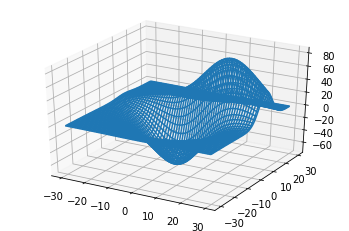

In [38]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

'''
def get_test_data(delta=0.05):

    from matplotlib.mlab import  bivariate_normal
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = Z2 - Z1

    X = X * 10
    Y = Y * 10
    Z = Z * 500
    return X, Y, Z

'''


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = axes3d.get_test_data(0.05)
ax.plot_wireframe(x,y,z, rstride=2, cstride=2)
plt.savefig('2D.png')
plt.show()